In [ ]:
import pandas as pd
import numpy as np

**CASE: Flash Cycles Targeted Mailing**

Flash Cycles, is a large, multinational manufacturing company. The company manufactures and sells metal and composite bicycles to North American, European and Asian commercial markets. While its base operation is located in Bothell, Washington with 290 employees, several regional sales teams are located throughout their market base.

In 2000, Adventure Works Cycles bought a small manufacturing plant, Importadores Neptuno, located in Mexico. Importadores Neptuno manufactures several critical subcomponents for the Flash Cycles product line. These subcomponents are shipped to the Bothell location for final product assembly. In 2001, Importadores Neptuno, became the sole manufacturer and distributor of the touring bicycle product group. Currently, there are four product lines: Mountain, Road, Sport and Touring. 

The marketing department of Flash Cycles wants to increase sales by targeting specific customers for a mailing campaign. By investigating the attributes of known customers, the company hopes to discover patterns that they can then apply to potential customers. They hope to use the discovered patterns to predict which prospective customers are most likely to purchase a product from the company.

DATA SET: Cyclebuyer.csv
The company's data warehouse, Flash Cycles DW, contains a list of past customers with their demographic data (TargetMail) with attributes such as ‘Cyclebuyer’, ‘MaritalStatus', 'YearlyIncome', 'TotalChildren', 'ChildrenAtHome', 'HouseOwnerFlag', 'NumberCarsOwned', 'Age'.

Please follow the instructions given below to complete your assignment.

i. Do not try feature engineering on the dataset as it will modify the answers

ii. Just Load the [train_LR.csv](https://drive.google.com/file/d/1wezBl6uA3zKD3YiEYUABkIs460LCJW2r/view)

iii. Create the dependent and independent variables for the training module (X_train, y_train)

iv. Similarly load the [test_LR.csv](https://drive.google.com/file/d/1ZeJw9YgszPRg583OrEBk1SRmrOv8_9je/view)

v. Create the dependent and independent variables for the test module (X_test, y_test)

vi. Run LogisticRegression() from sklearn module in default setup and predict cycle buyer as target (positives).

vii. Fit the model on X_train and y_train

viii. Do not try any hyper-prameter tuning on the model as it will modify the answers

ix. Predict on the X_train using the Logistic Regression model and store the predictions in y_pred_train

x. Predict on the X_test using the Logistic Regression model and store the predictions in y_pred_test

xi. Print the classification report for training and test data predictions

xii. Create the confusion matrix for test data

---

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Assignment_files/BA/Assignment3_train_LR.csv")
train_data.head()

,MaritalStatus,YearlyIncome,TotalChildren,ChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,CycleBuyer
0,1,130000,4,5,1,4,63,0
1,1,110000,1,1,1,4,54,0
2,1,60000,2,0,0,2,56,0
3,1,70000,5,4,1,3,53,0
4,0,90000,3,2,0,1,58,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MaritalStatus    12384 non-null  int64
 1   YearlyIncome     12384 non-null  int64
 2   TotalChildren    12384 non-null  int64
 3   ChildrenAtHome   12384 non-null  int64
 4   HouseOwnerFlag   12384 non-null  int64
 5   NumberCarsOwned  12384 non-null  int64
 6   Age              12384 non-null  int64
 7   CycleBuyer       12384 non-null  int64
dtypes: int64(8)
memory usage: 774.1 KB


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Assignment_files/BA/Assignment3_test_LR.csv")
test_data.head()

,MaritalStatus,YearlyIncome,TotalChildren,ChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,CycleBuyer
0,1,70000,4,2,1,1,62,0
1,0,30000,4,0,0,2,66,0
2,0,10000,2,2,1,0,43,0
3,1,70000,4,0,0,0,43,1
4,1,30000,0,0,1,2,34,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MaritalStatus    12384 non-null  int64
 1   YearlyIncome     12384 non-null  int64
 2   TotalChildren    12384 non-null  int64
 3   ChildrenAtHome   12384 non-null  int64
 4   HouseOwnerFlag   12384 non-null  int64
 5   NumberCarsOwned  12384 non-null  int64
 6   Age              12384 non-null  int64
 7   CycleBuyer       12384 non-null  int64
dtypes: int64(8)
memory usage: 774.1 KB


## **Based on the modelling exercise, answer the following questions.**

### Q1. How many observations are available in the training data?

In [ ]:
train_data.shape[0]

12384

### Q2. How many observations are available in the test data?

In [ ]:
test_data.shape[0]

6100

### Q3. What is the proportion of customers who have not bought cycles in the training dataset?

In [ ]:
train_data.value_counts(train_data.CycleBuyer == 0)

CycleBuyer
True     6244
False    6140
dtype: int64

In [ ]:
(6244/12384)*100

50.41989664082688

### Q4. What is the proportion of customers who have bought cycles in the training dataset?

In [ ]:
(6140/12384)*100

49.58010335917313

### Q5. What is the proportion of customers who have not bought cycles in the test dataset?

In [ ]:
test_data.value_counts(test_data.CycleBuyer == 0)

CycleBuyer
True     3108
False    2992
dtype: int64

In [ ]:
(3108/6100)*100

50.95081967213114

### Q6. What is the proportion of customers who have bought cycles in the test dataset?

In [ ]:
(2992/6100)*100

49.049180327868854

### **Fit the model on the train data and make predictions on the train data, and answer questions (7 to 9).**

In [ ]:
X_train = train_data[["MaritalStatus", "YearlyIncome",	"TotalChildren",	"ChildrenAtHome",	"HouseOwnerFlag",	"NumberCarsOwned",	"Age"]]
y_train = train_data["CycleBuyer"]
X_test = test_data[["MaritalStatus", "YearlyIncome",	"TotalChildren",	"ChildrenAtHome",	"HouseOwnerFlag",	"NumberCarsOwned",	"Age"]]
y_test = test_data["CycleBuyer"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)

### Q7. Compare the predictions of y_train and y_pred_train. What is the training accuracy?

In [ ]:
accuracy_score(y_train, y_pred_train)

0.5274547803617571

### Q8. What is the training data precision of your model if the aim is to find customers who will not buy cycles?

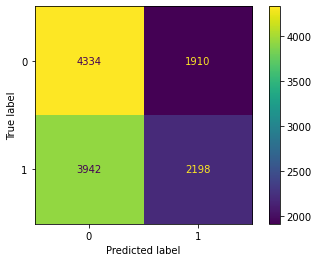

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

In [ ]:
print(cm)

[[4334 1910]
 [3942 2198]]


In [ ]:
cm[0,0]/(cm[0,0]+cm[1,0])

0.5236829386176897

### Q9. What is the training data recall of your model if the aim is to find customers who will buy cycles?

In [ ]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.35798045602605866

### Q10. After training your model on the train data, make predictions on the test data, and answer questions 10 to 14. From the confusion matrix, identify the number of true positives.

In [ ]:
y_pred_test = logreg.predict(X_test)

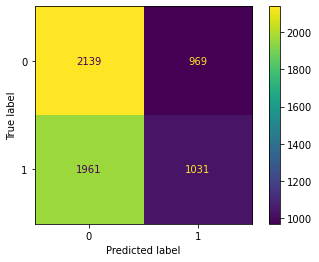

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [ ]:
print(cm2)

[[2139  969]
 [1961 1031]]


Ans : 1031

### Q11. In the test data confusion matrix, identify the number of true negatives.

Ans : 2139

### Q12. What is the precision of your model in the test data if the aim is to find customers who will not buy cycles?

In [ ]:
cm2[0,0]/(cm2[0,0]+cm2[1,0])

0.5217073170731708

### Q13. What is the recall of your model in the test data if the aim is to find customers who will buy cycles?

In [ ]:
cm2[1,1]/(cm2[1,1]+cm2[1,0])

0.3445855614973262

### Q14. Has the precision for predicting if a customer will buy cycle increased or decreased when the model is tested on the testing data set as compared to the results obtained from the training data set?

A. Increased

B. Decreased

C. Both are equal

Ans : Decreased

### Q15. Has the recall for predicting if a customer will buy cycle increased or decreased when the model is tested on the testing data set as compared to the results obtained from the training data set?

A. Increased

B. Decreased

C. Both are equal

Ans : Decreased

### Q16. Has the accuracy for predicting if a customer will buy cycle increased or decreased when the model is tested on the testing data set as compared to the results obtained from the training data set?

A. Increased

B. Decreased

C. Both are equal

In [ ]:
logreg.score(X_train, y_train) > logreg.score(X_test, y_test)

True

Ans : Decreased